Importing necessary libraries to perform basic analysis of the crypt market data.

In [ ]:
pip install yfinance


In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

In [23]:
#retrieve two months of Bitcoin to USD exchange with one day interval
BTC_USD = yf.download("BTC-USD", start='2022-1-31',end='2022-3-31',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [24]:
#gives first five 5 data
BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-30,38151.917969,38266.339844,37437.710938,37917.601562,37917.601562,14643548444
2022-01-31,37920.281250,38647.261719,36733.574219,38483.125000,38483.125000,20734730465
2022-02-01,38481.765625,39115.132812,38113.664062,38743.273438,38743.273438,20288500328
2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416
2022-02-03,36944.804688,37154.601562,36375.539062,37154.601562,37154.601562,18591534769


Creating a price chart

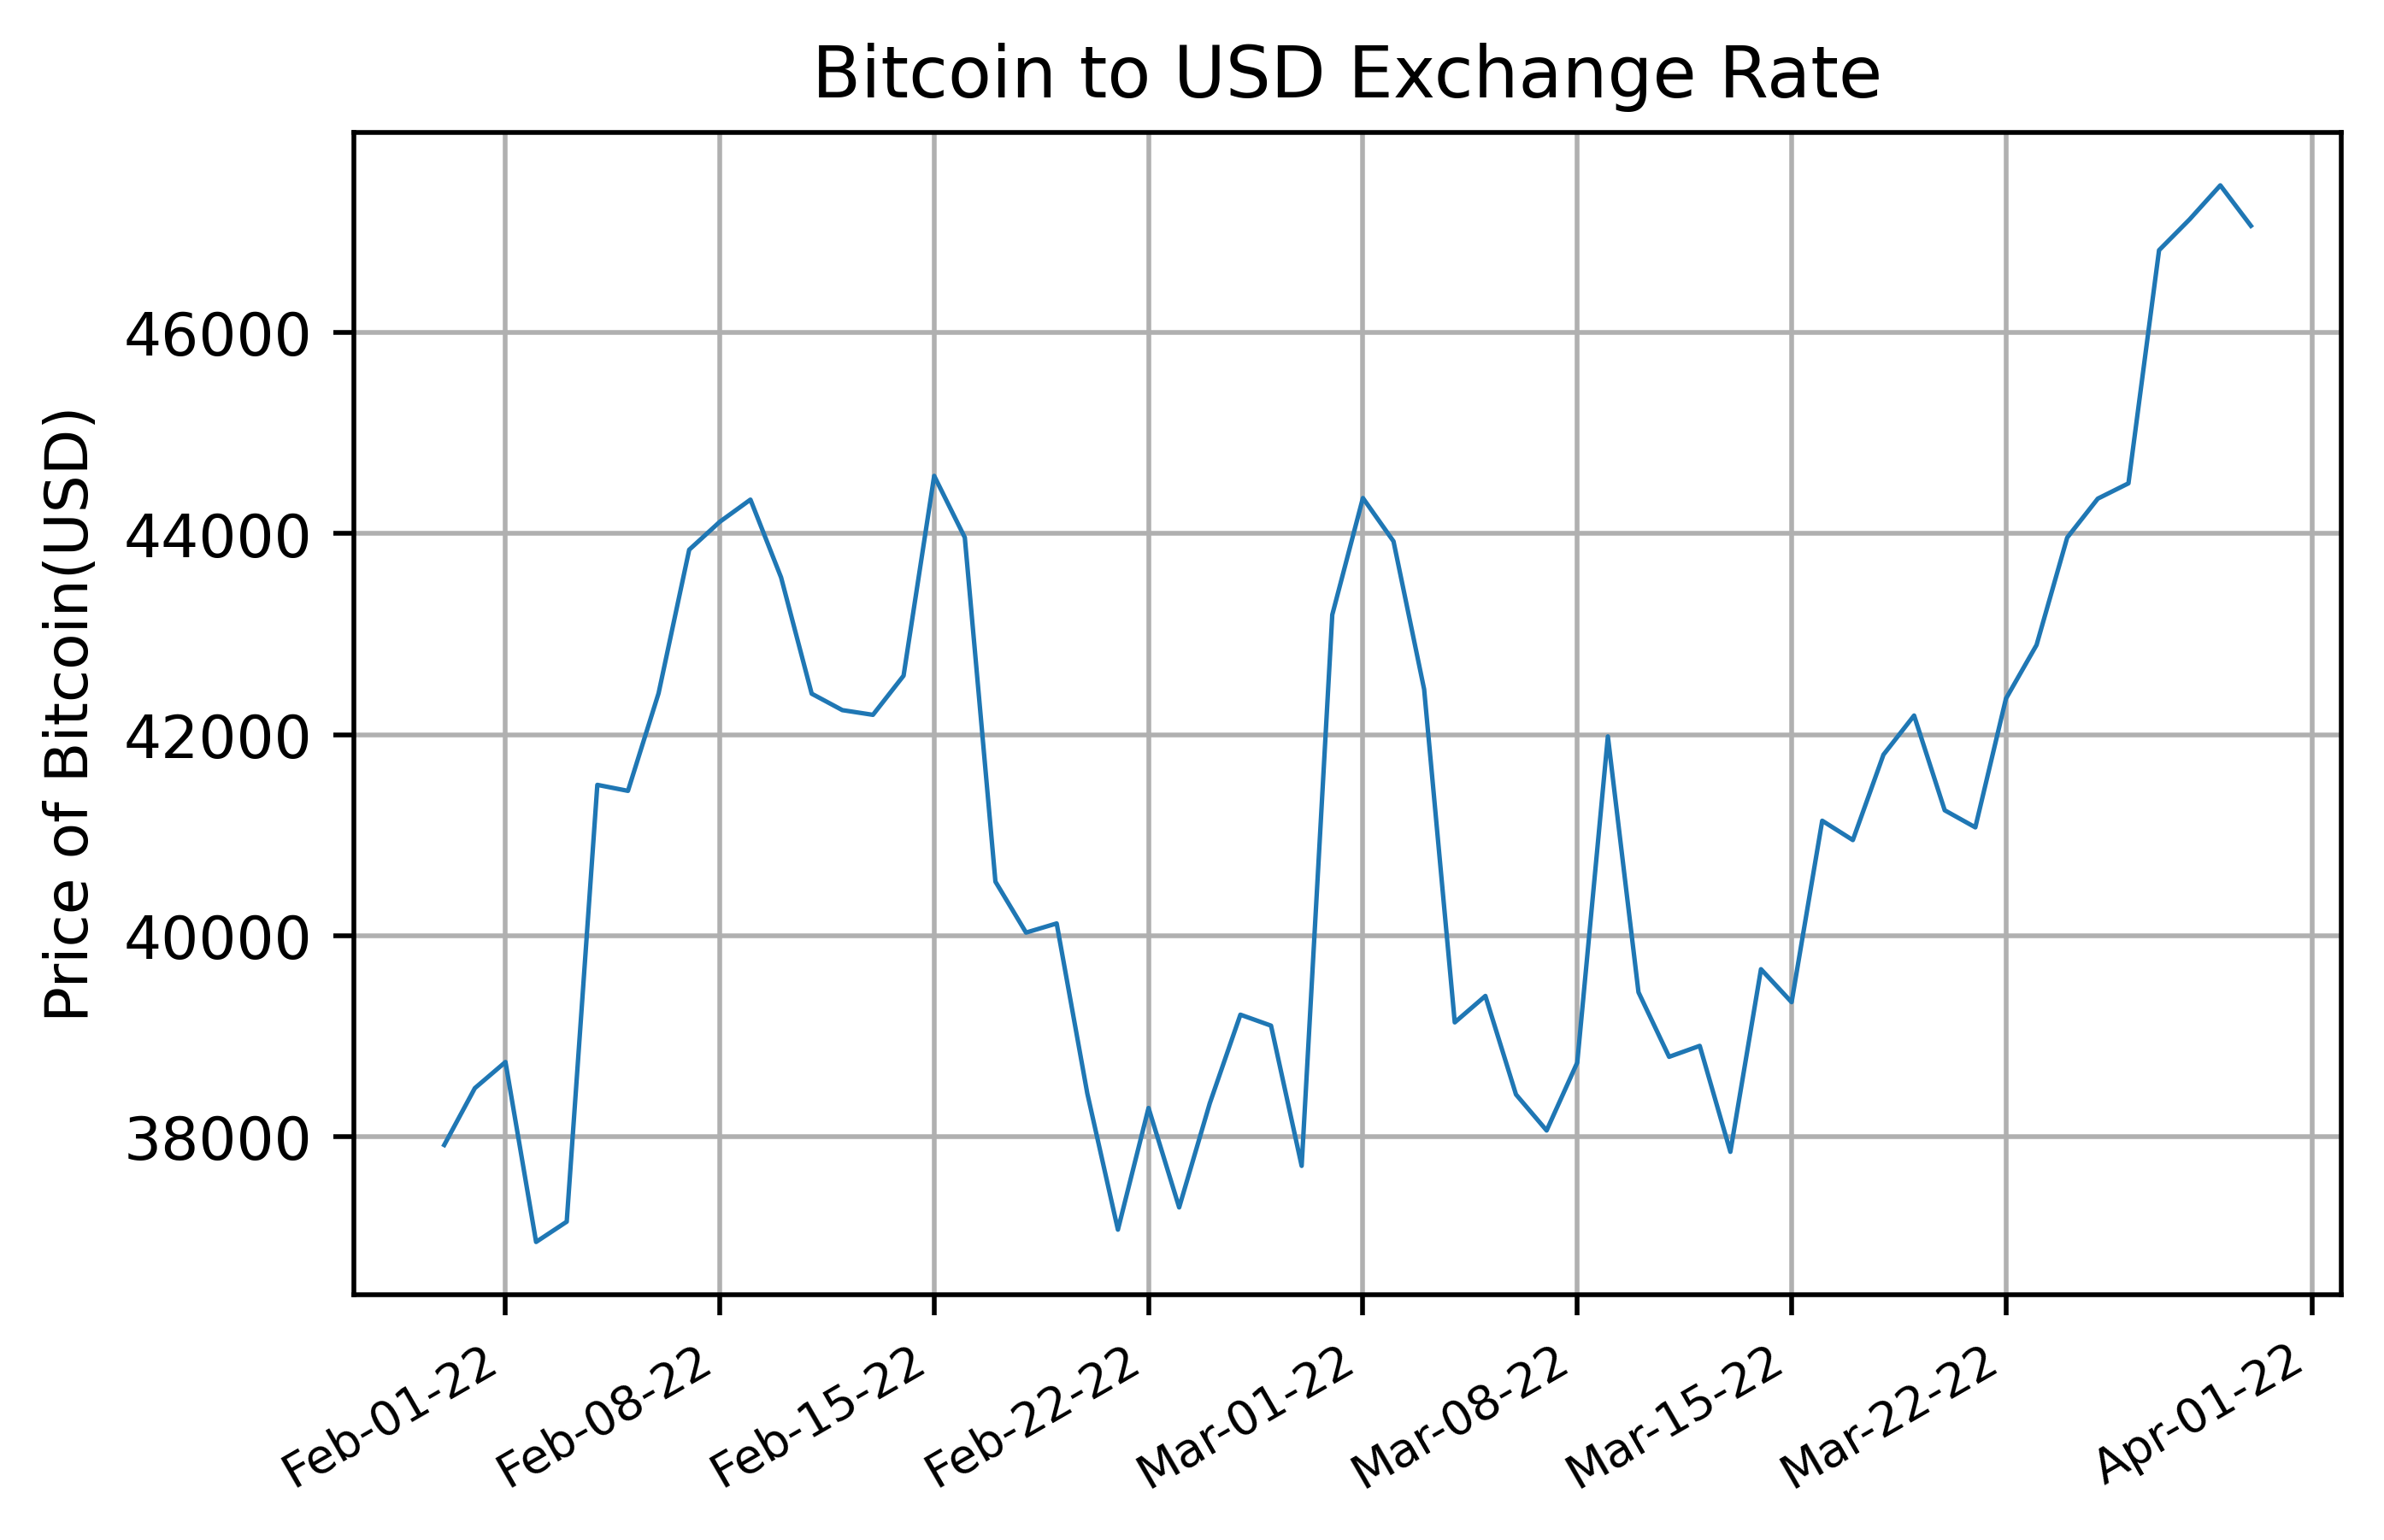

In [25]:
fig,ax= plt.subplots(dpi=500) #dpi=dots per pixel

#formatting the date axis
date_format = DateFormatter('%h-%d-%y')
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x',labelsize=8)
fig.autofmt_xdate() #tilt the label

#Plotting the closing price against the date(1-day interval)
ax.plot(BTC_USD['Close'],lw=0.75) #lw=line width

#Adding titles and labels to the plot
ax.set_ylabel('Price of Bitcoin(USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() #adding a grid

#displaying the price chart
plt.show()

To reveal long term trends and smooth out short term fluctuations we calculate and study Moving Averages

In [26]:
# Compute a 9-day Simple Moving Average with pandas
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()

#['SMA_9'] adds new column to the BTC_USD dataframe

# Compute a 30-day Simple Moving Average with pandas
BTC_USD['SMA_30']=BTC_USD['Close'].rolling(window=30,min_periods=1).mean()

In [27]:
#tail shows the last five entries 
BTC_USD.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2022-03-26,44349.859375,44735.996094,44166.273438,44500.828125,44500.828125,16950455995,42708.876302,40872.006120
2022-03-27,44505.355469,46827.546875,44437.292969,46820.492188,46820.492188,28160889722,43266.580295,41125.548568
2022-03-28,46821.851562,48086.835938,46690.203125,47128.003906,47128.003906,36362175703,43815.174913,41392.977083
2022-03-29,47100.437500,48022.289062,47100.437500,47465.730469,47465.730469,31397059069,44506.053385,41718.175260
2022-03-30,47456.898438,47655.148438,46746.210938,47062.664062,47062.664062,29333883962,45171.016493,41847.156250


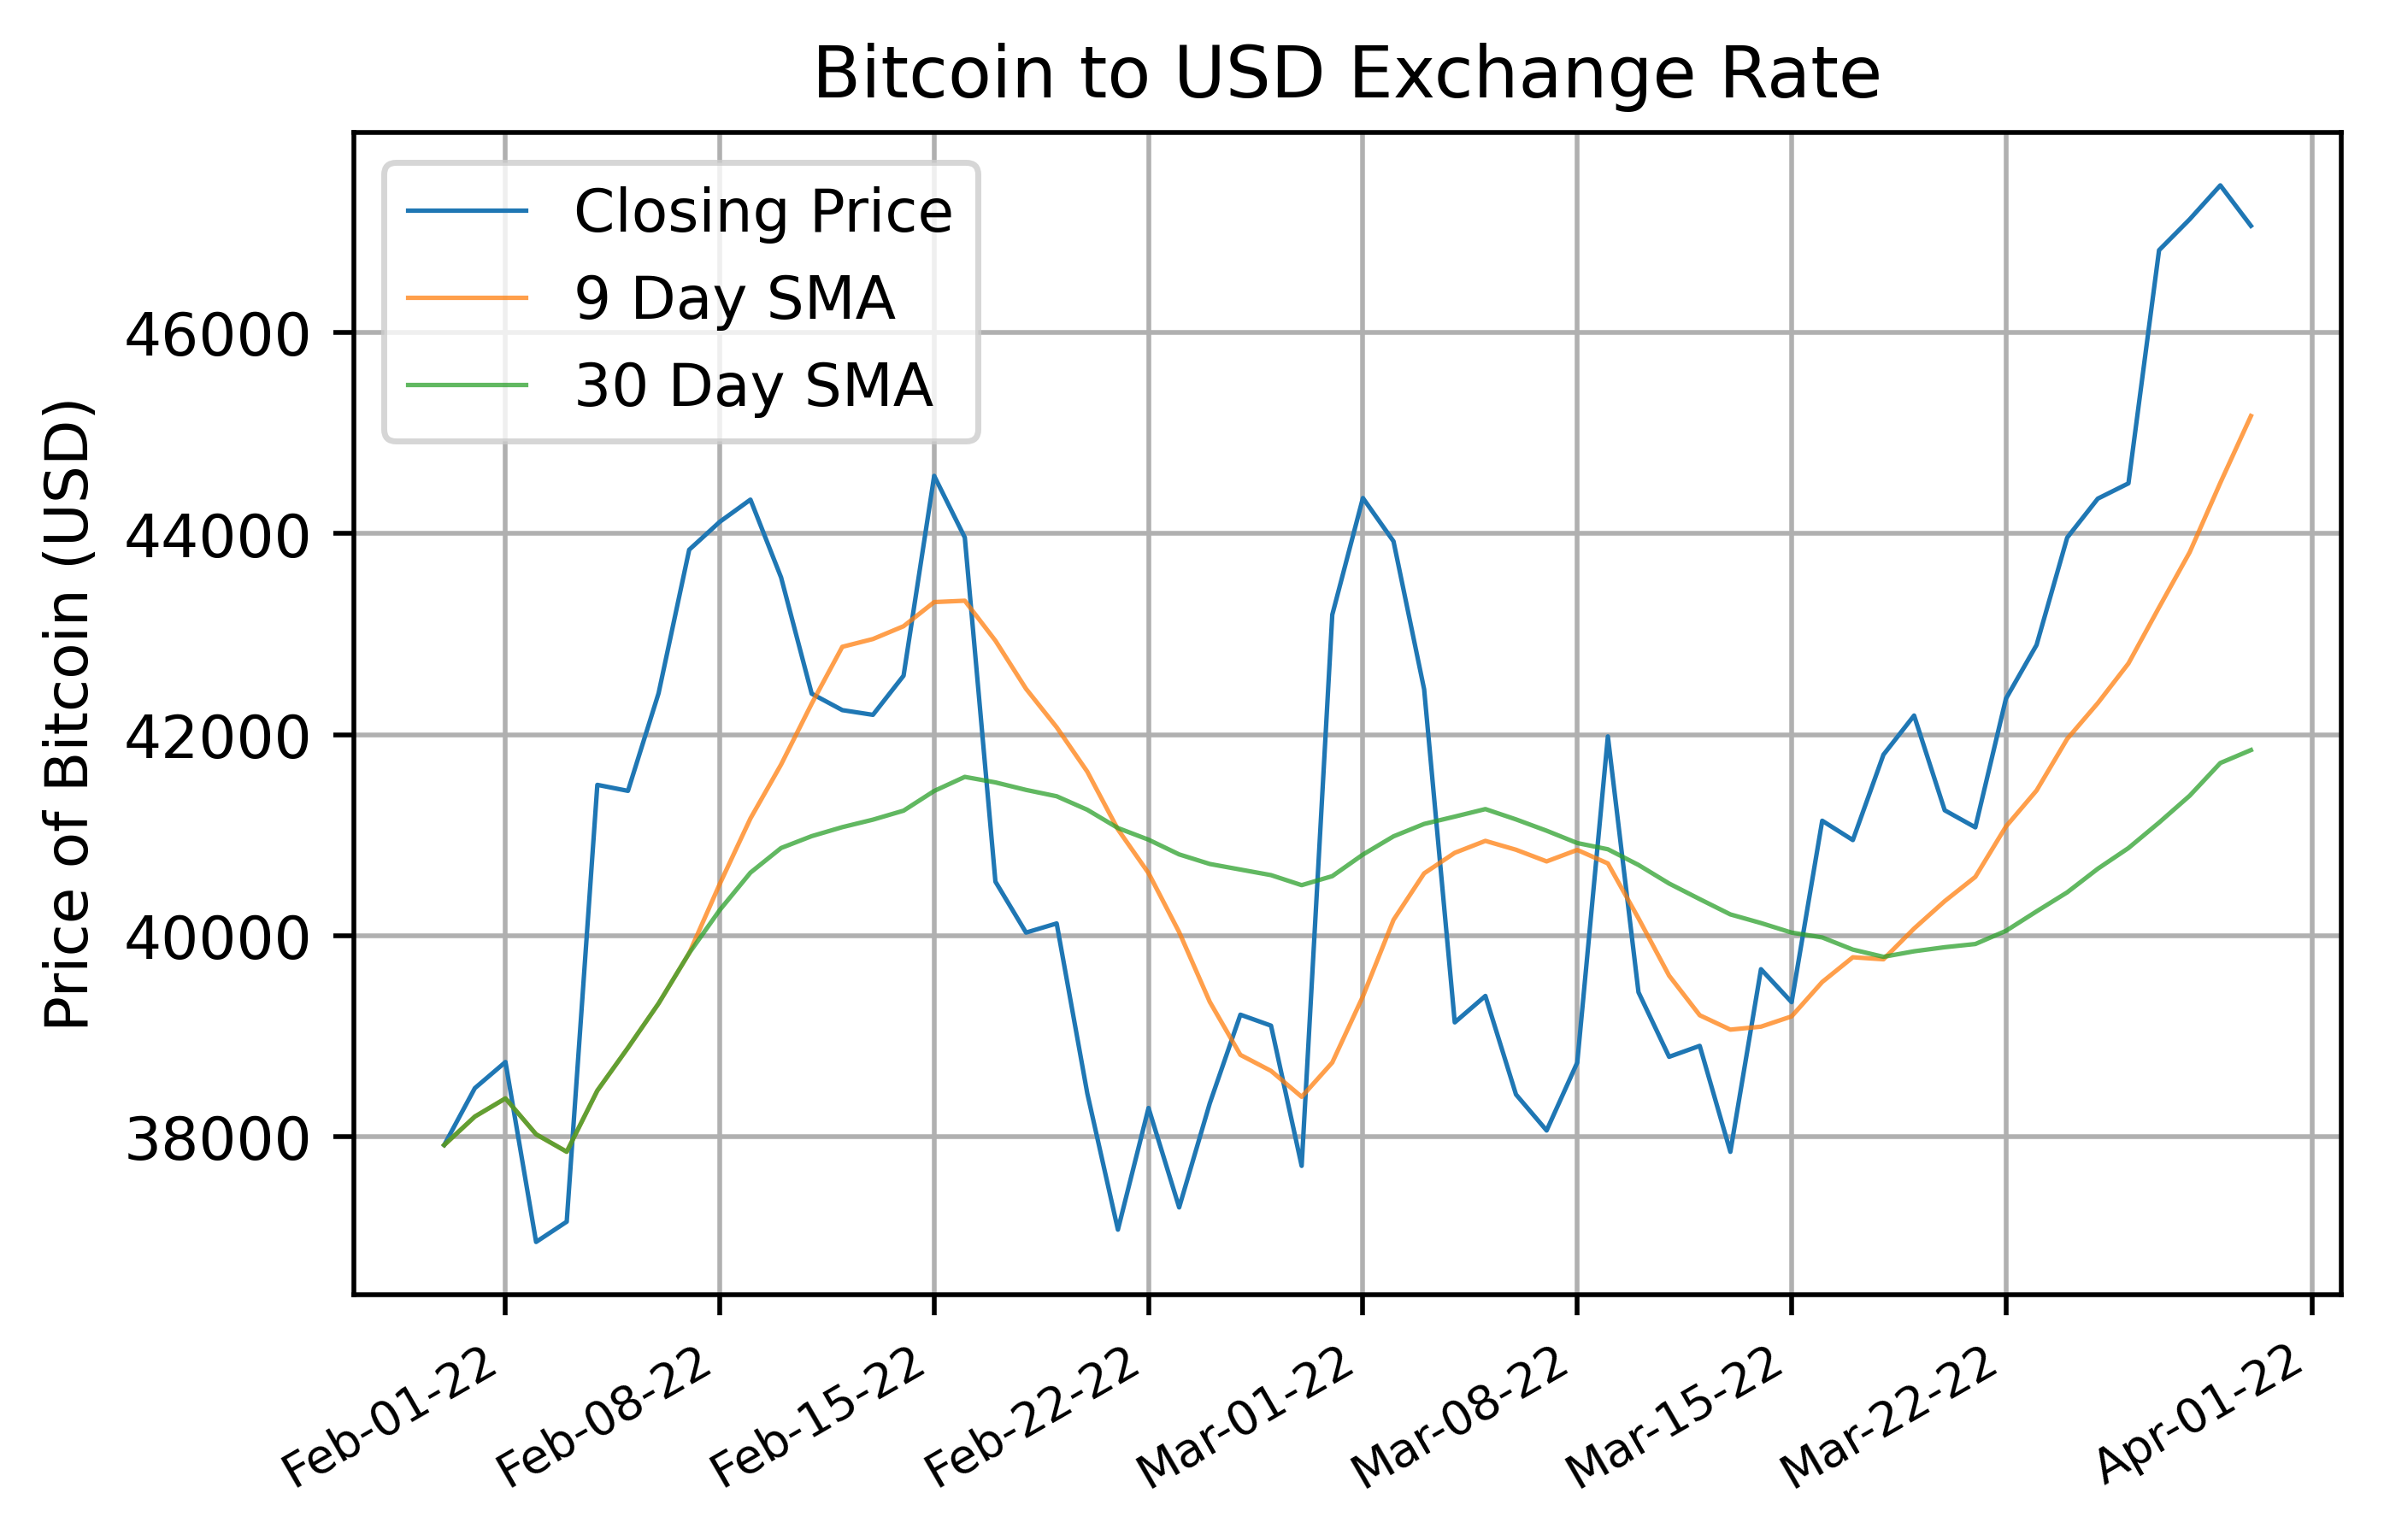

In [28]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

One of the simplest trading strategies making use of Simple Moving Averages is the Moving Average Crossover. The basic idea behind this strategy is to use two Simple Moving Averages - one with a relatively short sampling interval and the other with a longer interval. When the shorter moving average crosses over the longer interval moving average, it can signal a reversal in trend. For example, if the shorter term moving average is below the longer moving average but then crosses over to the top of it, this may signal the beginning of an upwards (bullish) trend. Using the Moving Average Crossover strategy, this would be a buy signal. Similarily, when the shorter moving average is above the longer interval one and it crosses under, this could signal a downward (bearish) trend, which would be a sell signal in this strategy.`

In [29]:
#create a pandas dataframe that is the same size as the BTC_USD dataframe and covers the same dates
trade_signals = pd.DataFrame(index=BTC_USD.index)

#define intervals for the fast and slow simple moving avaerges
short_interval = 10
long_interval = 40

#compute the simple moving averages and add it as new columns in the dataframe
trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval,min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval,min_periods=1).mean()



In [31]:
#create a column populated with zeroes
trade_signals['Signal']=0.0

#set the signal column to 1 wherever short_term SMA is above long_term SMA,otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0) 

According to our Moving Average Crossover strategy, we want to buy when the short-term SMA crosses the long-term SMA from below, and sell when it crosses over from above. We can easily use the Signal column in the trade_signals dataframe to determine where exactly these events occur. If the Signal column has value 0.0 on a given date then switches to 1.0, this means the short-term SMA crossed the long-term SMA from below - this is our time to buy Bitcoin according to our strategy. On the other hand, if the value goes from 1.0 to 0.0, that tells us the short-term SMA was above the long-term SMA and then crossed over - this is our time to sell.

Using this method, we can easily compute the action the algorithm should take at each step. Suppose the short-term SMA is below the long-term SMA. Then for that period, the Signal column will have the value 0. Then suppose we have a crossing, such that the short-term SMA now moves above the long-term one. Then the Signal column will now have value 1.0 and so the diff() method will compute the difference between the Signal value that day and the one before, i.e.,  1−0=1 , thus giving us a Positions value of 1 for that day (i.e., a buy order). The opposite scenario occurs when the short-term SMA crosses back underneath the long-term SMA. the diff() method assigns a value of  0−1=−1  to the Position column on the day of the crossing (i.e., a sell order). On the days where there is no crossing, each consecutive day has the same value in the Signal column, so the diff() method assigns a value of 0 to the Position column.


In [34]:
#create a new column in trade_signals dataframe called position
trade_signals['Position']=trade_signals['Signal'].diff()

Visualising the algorithms trade. Placing a upward facing green arrow where the algorithm places a buy order and placing a downwards facing red arrow where the algorithm places a sell order.

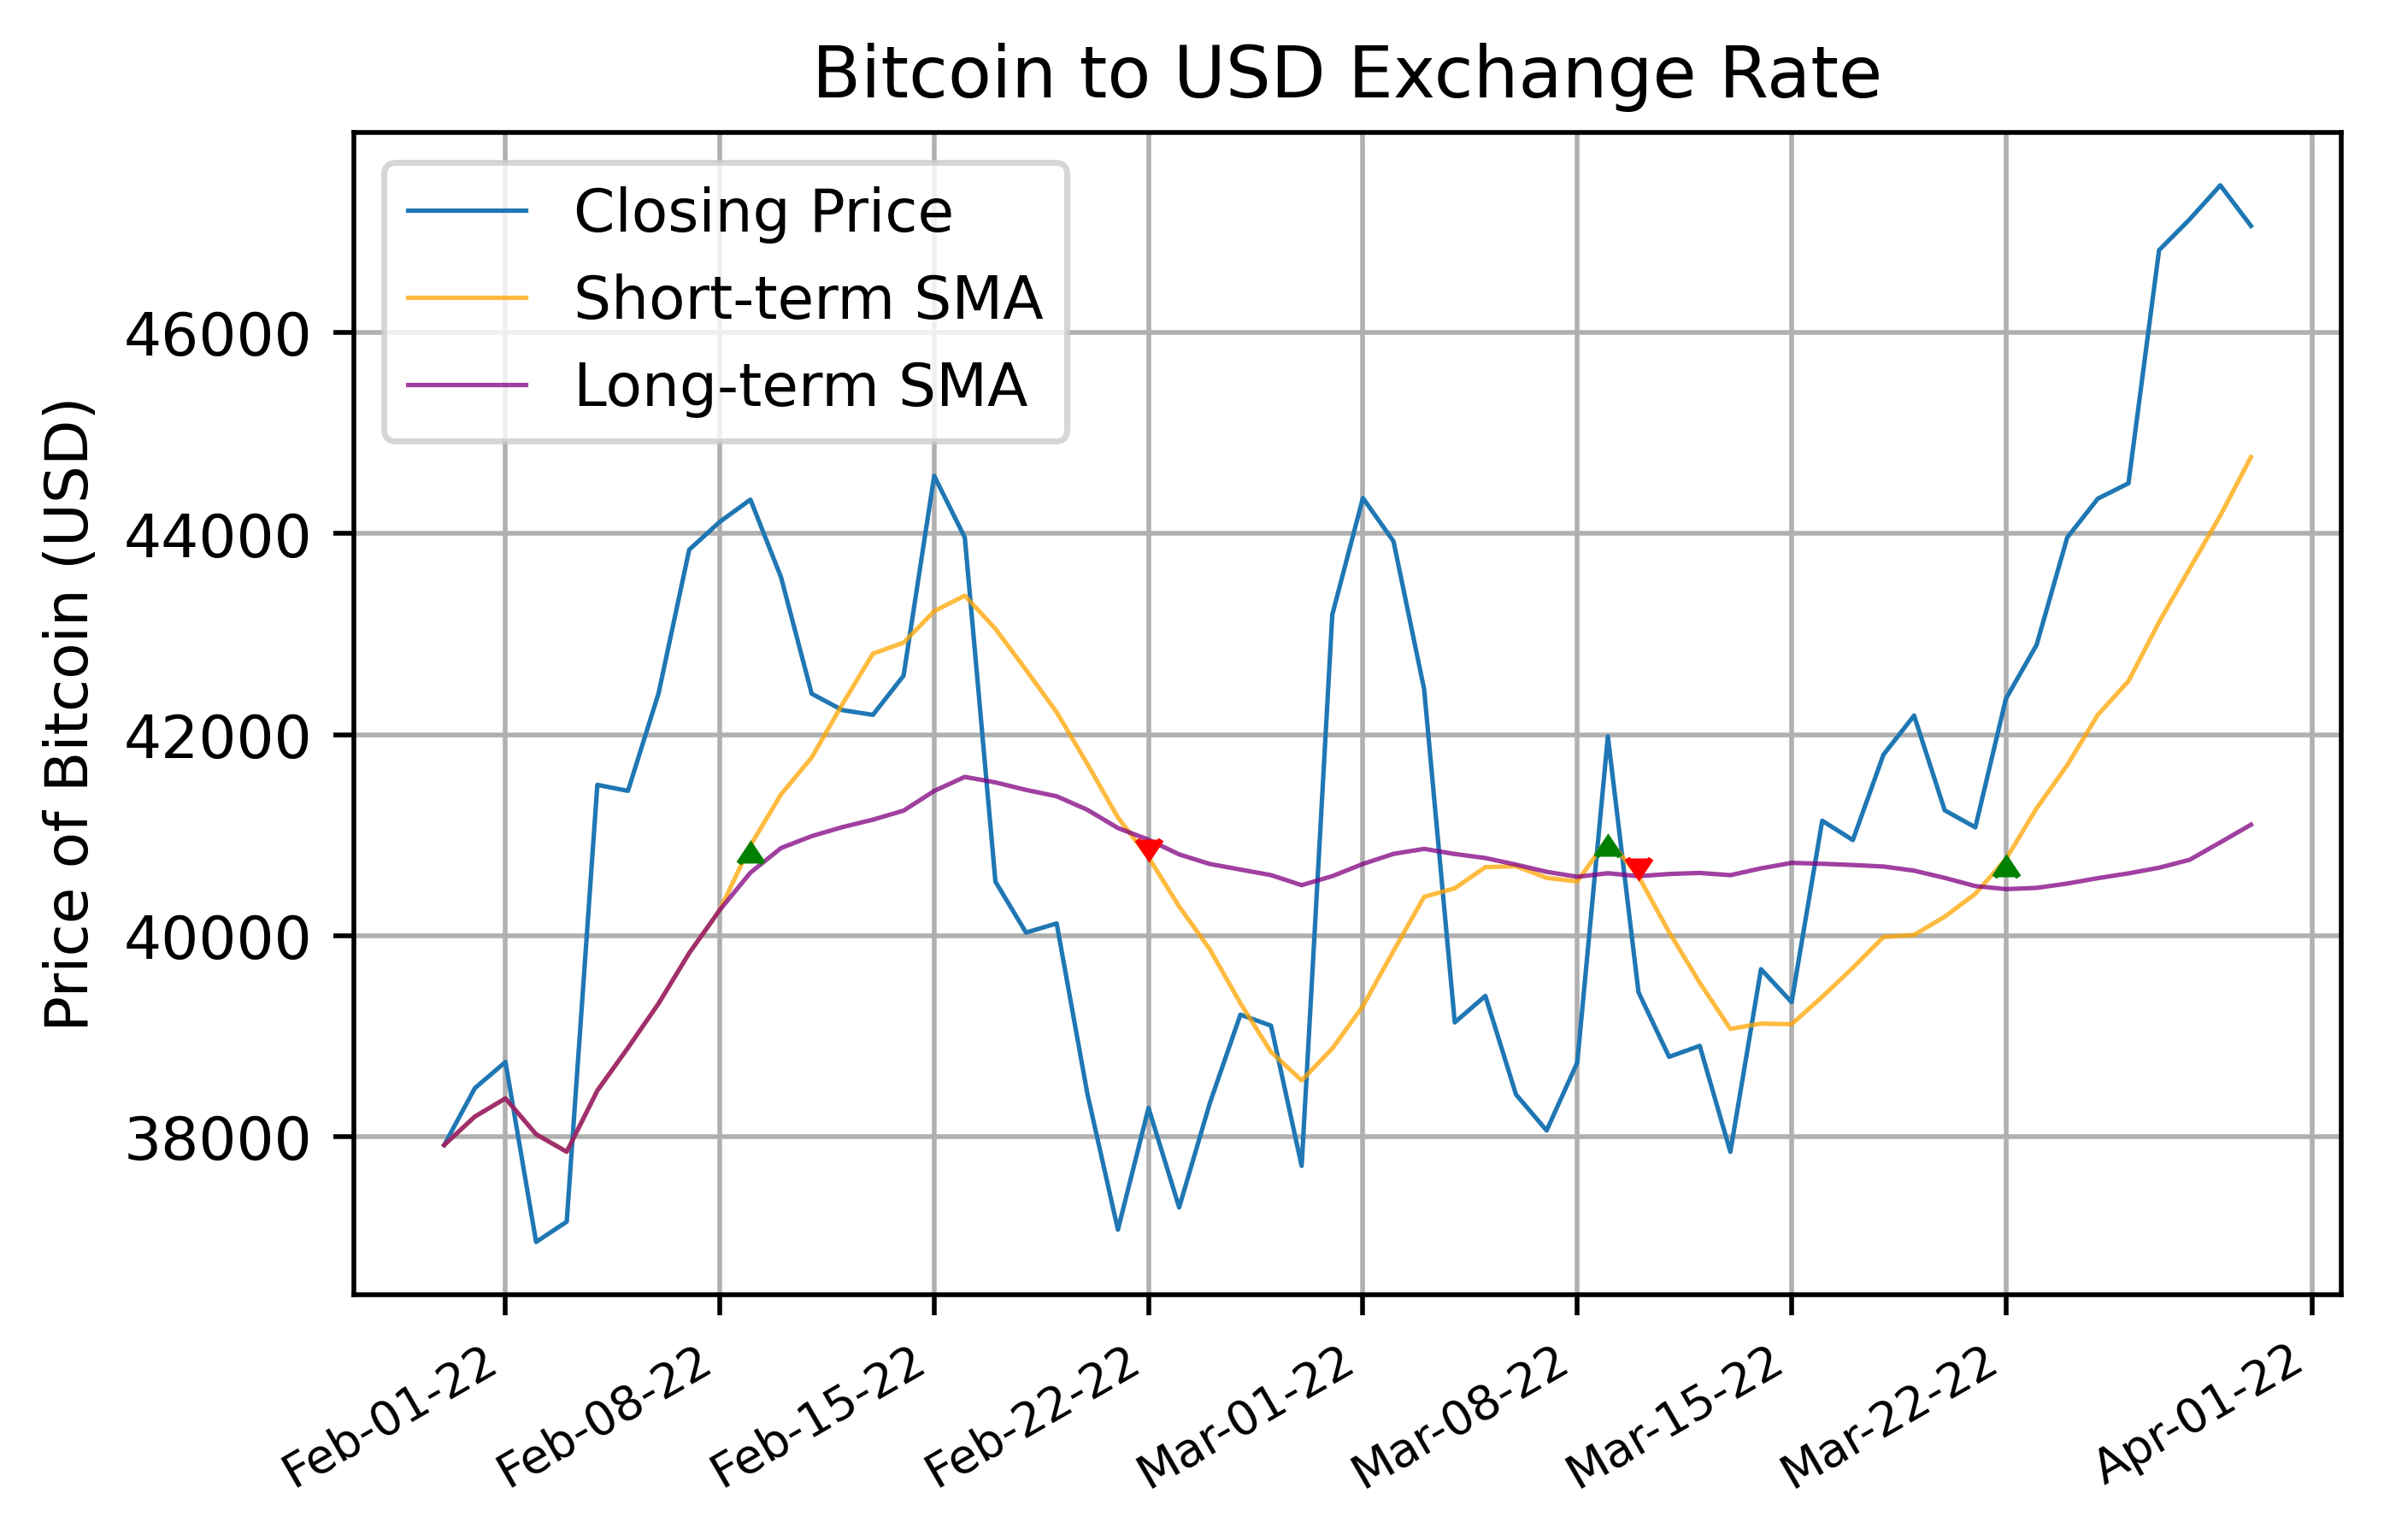

In [44]:
fig,ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# Plotting the shorter-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plotting the longer-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')

#green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position']==1.0],marker=6, ms=4, linestyle='none',color='green')

#green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Position']==-1.0].index, trade_signals.Short[trade_signals['Position']==-1.0],marker=7, ms=4, linestyle='none',color='red')

# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

Implementing a simple backtest


In [46]:
#define how much money to start with(in USD)
initial_balance = 100000.0 #hundred thousand USD

#creating dataframe containing all the dates considered
backtest = pd.DataFrame(index=trade_signals.index)

#Add coloumn containing the daily percent returns of Bitcoin
backtest['BTC_Return'] = BTC_USD['Close']/BTC_USD['Close'].shift(1) #current/yesterdays closing price


Now to compute the daily returns of the trading algorithm, let's assume that at any given point, our portfolio is either all in on Bitcoin or is entirely holding USD. This means that whenever the algorithm is currently holding Bitcoin, it's daily returns are the same as the daily returns of Bitcoin. On the other hand, when the algorithm is holding USD, its returns are entirely detached from Bitcoin price movements. Thus when holding USD, the value of the portfolio remains constant during that period. We will also make the simplifying assumption that we are able to perform zero comission trades. This reasoning is condensed into the following two lines of code.

In [47]:
# Add column containing the daily percent returns of the Moving Average Crossover strategy
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

# Add column containing the daily value of the portfolio using the Crossover strategy
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod() # cumulative product

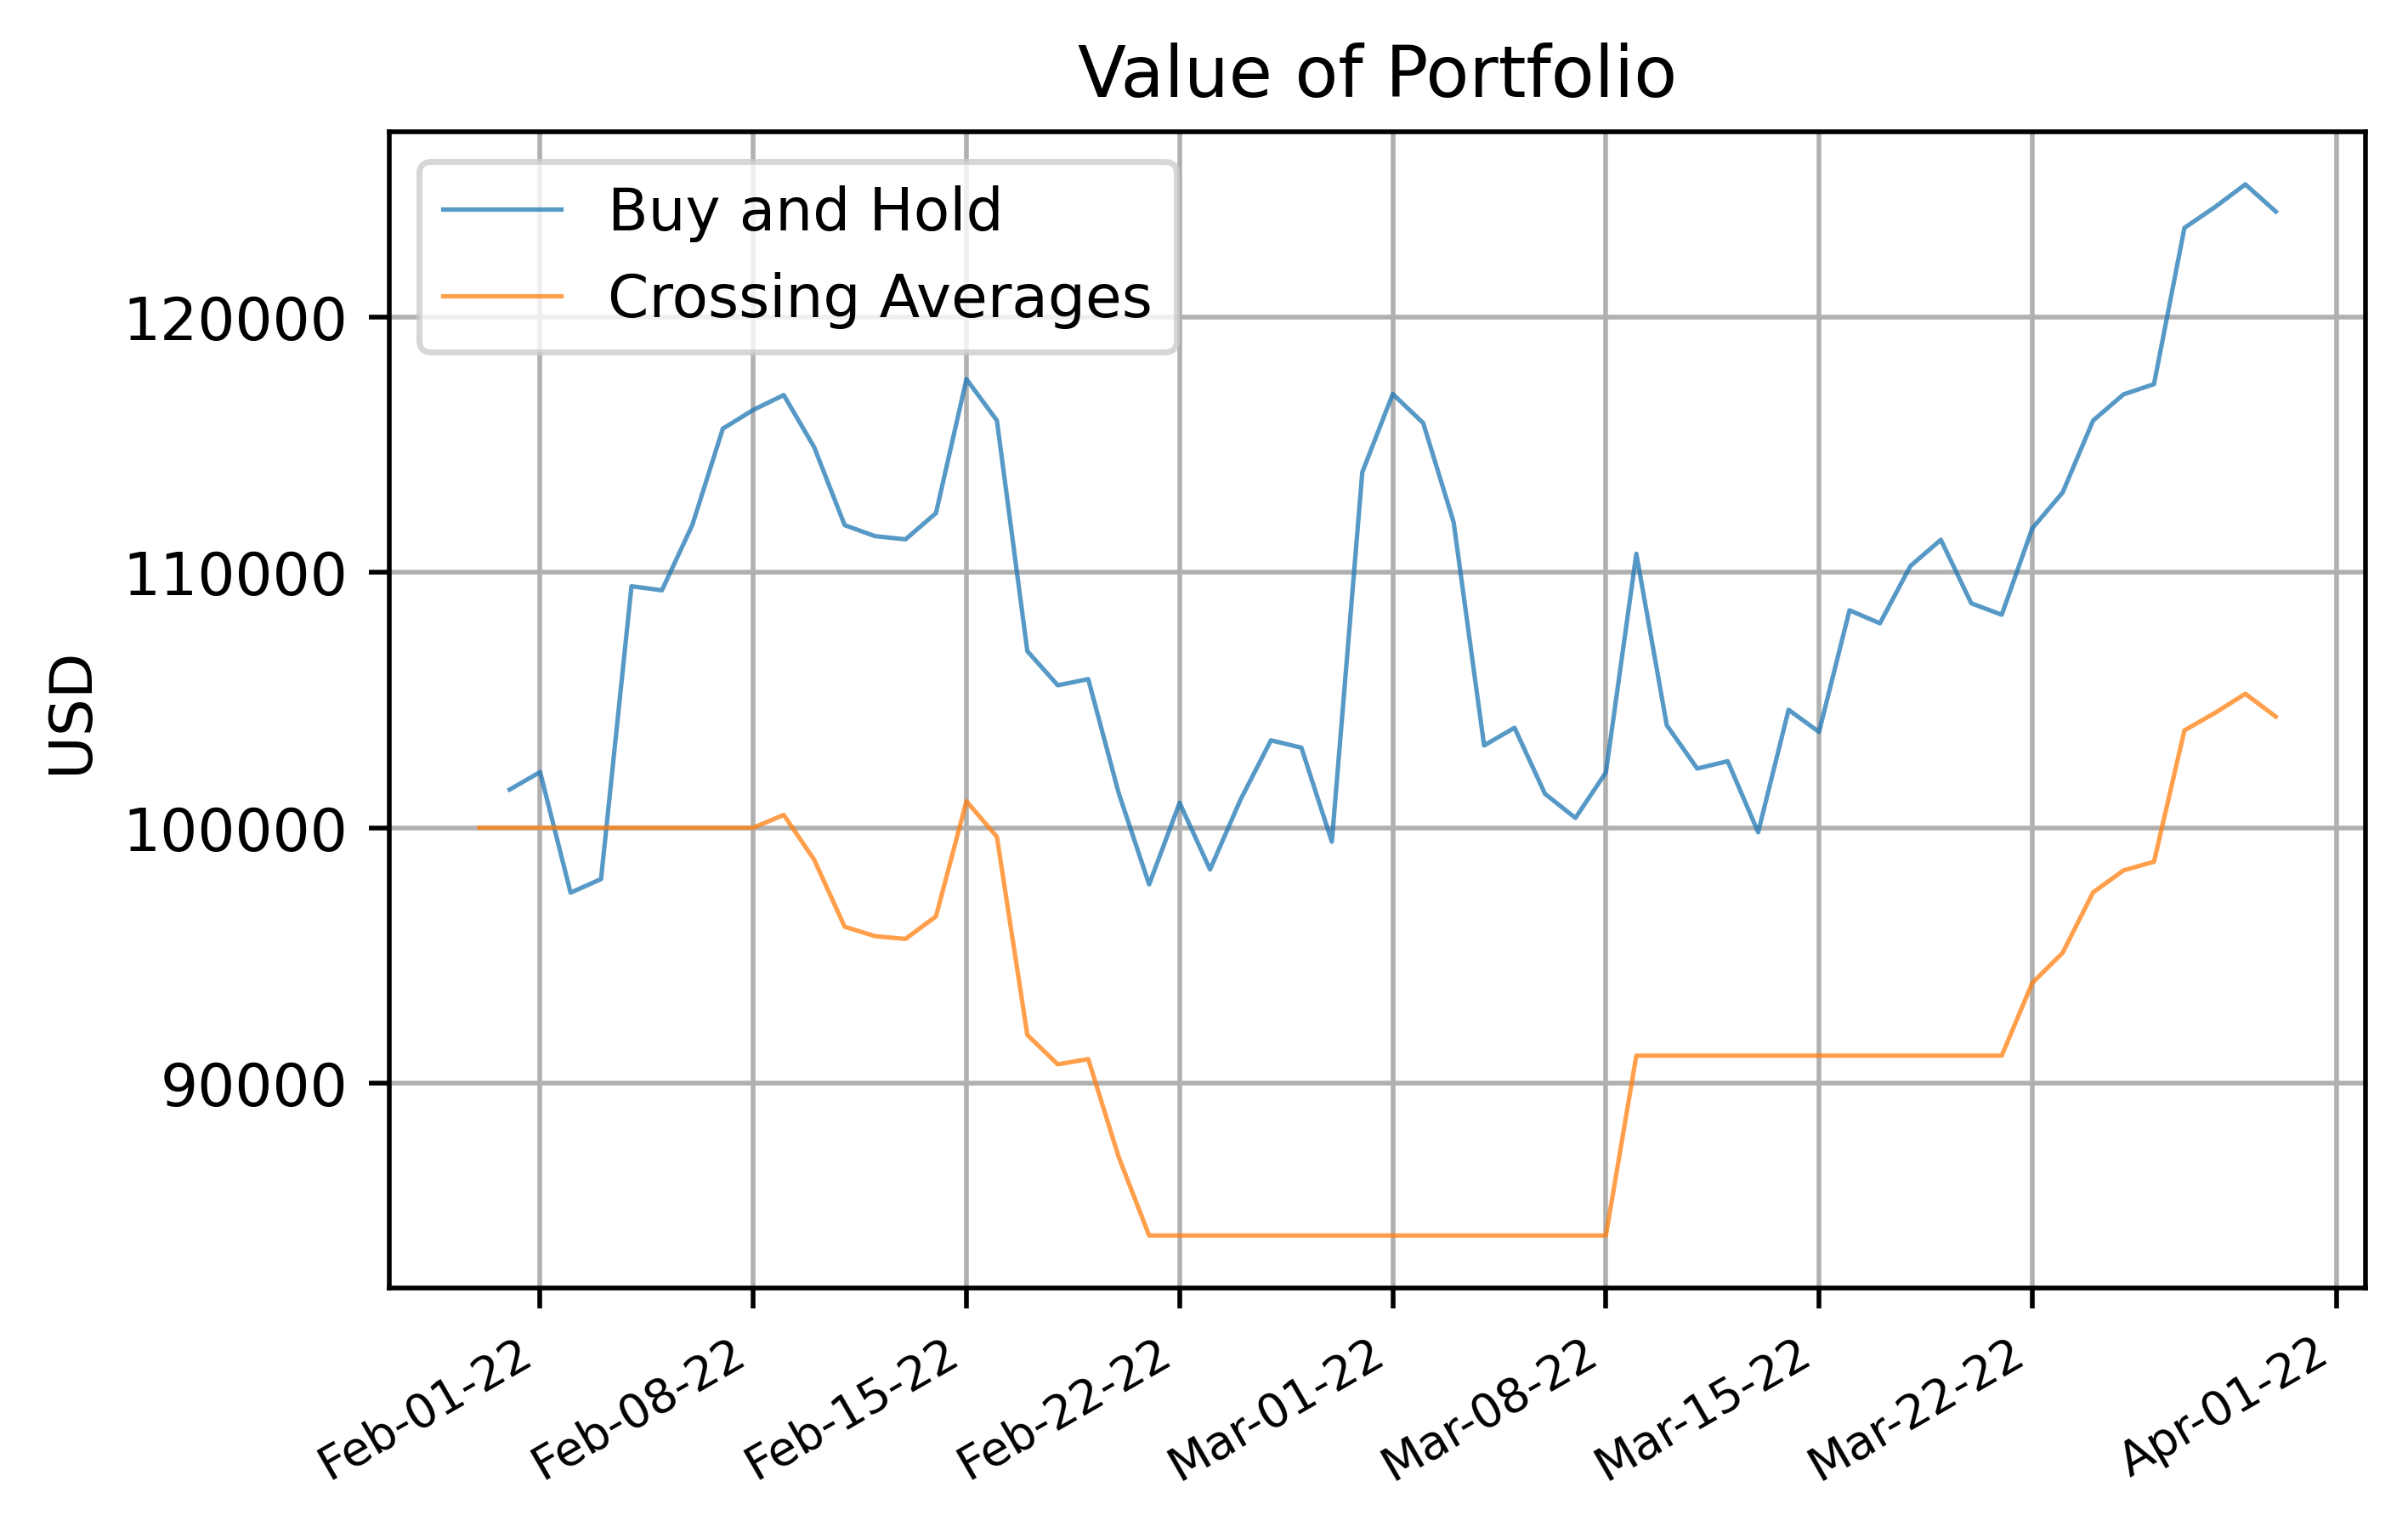

In [48]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()